In [57]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=open("WhatsApp Chat with Roomate 1217.txt",encoding="utf-8")

In [3]:
data=file.read()
print(data)

07/09/24, 11:10 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
07/09/24, 11:10 am - Gaurav Roommate created group "Roomate "
07/09/24, 11:10 am - Gaurav Roommate added you
07/09/24, 11:11 am - Gaurav Roommate: Ek passports size photo le ana hardcopy bhuda ro rha
07/09/24, 11:13 am - Gaurav Roommate changed the group description
07/09/24, 11:53 am - Sakib Malik: <Media omitted>
07/09/24, 1:02 pm - Gaurav Roommate added Ankul BCA Dhakdei
07/09/24, 1:03 pm - Ankul BCA Dhakdei changed the group description
07/09/24, 4:56 pm - Gaurav Roommate: <Media omitted>
07/09/24, 4:57 pm - Gaurav Roommate: Ek form milega school admision ka bhar Dena wo yh dekh kr
07/09/24, 6:34 pm - Gaurav Roommate changed the group description
11/09/24, 11:19 am - Gaurav Roommate: Saturday Sunday ja rhe ho kya
11/09/24, 11:19 am - Sakib Malik: Na ghar ni jana h.
11/09/24, 11:19 am - Gaurav Roommate: Fir kahn jana h
11/09

In [4]:
pattern=r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s[a-zA-Z]{2}\s-\s"

In [5]:
message=re.split(pattern,data)
message

['',
 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Gaurav Roommate created group "Roomate "\n',
 'Gaurav Roommate added you\n',
 'Gaurav Roommate: Ek passports size photo le ana hardcopy bhuda ro rha\n',
 'Gaurav Roommate changed the group description\n',
 'Sakib Malik: <Media omitted>\n',
 'Gaurav Roommate added Ankul BCA Dhakdei\n',
 'Ankul BCA Dhakdei changed the group description\n',
 'Gaurav Roommate: <Media omitted>\n',
 'Gaurav Roommate: Ek form milega school admision ka bhar Dena wo yh dekh kr\n',
 'Gaurav Roommate changed the group description\n',
 'Gaurav Roommate: Saturday Sunday ja rhe ho kya\n',
 'Sakib Malik: Na ghar ni jana h.\n',
 'Gaurav Roommate: Fir kahn jana h\n',
 'Sakib Malik: Noor ke doodh Lene use garam krna pina so jana 🤣\n',
 'Gaurav Roommate: Room dekhne ni chlna\n',
 'Ajay Roommate: Aare h ½ gnte me\n',
 'Gaurav Roommate: ?\n',
 'Gaurav Roommate: Kya scene h

In [6]:
pattern2=r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}"
dates=re.findall(pattern,data)
dates

['07/09/24, 11:10\u202fam - ',
 '07/09/24, 11:10\u202fam - ',
 '07/09/24, 11:10\u202fam - ',
 '07/09/24, 11:11\u202fam - ',
 '07/09/24, 11:13\u202fam - ',
 '07/09/24, 11:53\u202fam - ',
 '07/09/24, 1:02\u202fpm - ',
 '07/09/24, 1:03\u202fpm - ',
 '07/09/24, 4:56\u202fpm - ',
 '07/09/24, 4:57\u202fpm - ',
 '07/09/24, 6:34\u202fpm - ',
 '11/09/24, 11:19\u202fam - ',
 '11/09/24, 11:19\u202fam - ',
 '11/09/24, 11:19\u202fam - ',
 '11/09/24, 11:58\u202fam - ',
 '28/09/24, 5:56\u202fpm - ',
 '28/09/24, 5:56\u202fpm - ',
 '28/09/24, 6:19\u202fpm - ',
 '28/09/24, 6:30\u202fpm - ',
 '06/10/24, 6:34\u202fpm - ',
 '06/10/24, 6:36\u202fpm - ',
 '06/10/24, 6:36\u202fpm - ',
 '06/10/24, 6:36\u202fpm - ',
 '08/10/24, 7:19\u202fpm - ',
 '08/10/24, 7:19\u202fpm - ',
 '08/10/24, 7:19\u202fpm - ',
 '09/10/24, 10:09\u202fam - ',
 '09/10/24, 7:13\u202fpm - ',
 '09/10/24, 7:13\u202fpm - ',
 '10/10/24, 5:07\u202fpm - ',
 '10/10/24, 5:08\u202fpm - ',
 '10/10/24, 5:08\u202fpm - ',
 '10/10/24, 5:26\u202fpm - ',

In [7]:
message=message[1:]
len(message),len(dates)

(287, 287)

In [8]:
df=pd.DataFrame({'user_messages':message,'message_date':dates})

In [9]:
df['message_date'] = df['message_date'].str.replace('\u202f', ' ', regex=True)  
df['message_date'] = df['message_date'].str.replace(' - ', '', regex=True) 
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p', errors='coerce')

In [10]:
df['message_date']

0     2024-09-07 11:10:00
1     2024-09-07 11:10:00
2     2024-09-07 11:10:00
3     2024-09-07 11:11:00
4     2024-09-07 11:13:00
              ...        
282   2025-01-23 10:08:00
283   2025-01-23 10:08:00
284   2025-01-23 10:08:00
285   2025-01-23 10:08:00
286   2025-01-23 10:08:00
Name: message_date, Length: 287, dtype: datetime64[ns]

In [11]:
df.rename(columns={'message_date':'date'},inplace=True)

In [12]:
df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,2024-09-07 11:10:00
1,"Gaurav Roommate created group ""Roomate ""\n",2024-09-07 11:10:00
2,Gaurav Roommate added you\n,2024-09-07 11:10:00
3,Gaurav Roommate: Ek passports size photo le an...,2024-09-07 11:11:00
4,Gaurav Roommate changed the group description\n,2024-09-07 11:13:00


In [13]:
df['user_messages']

0      Messages and calls are end-to-end encrypted. N...
1             Gaurav Roommate created group "Roomate "\n
2                            Gaurav Roommate added you\n
3      Gaurav Roommate: Ek passports size photo le an...
4        Gaurav Roommate changed the group description\n
                             ...                        
282                  Sakib Malik: Phir ankul ke paas h\n
283                  Gaurav Roommate: Dusra tala h koi\n
284                        Sakib Malik: Wo to kharab h\n
285                 Sakib Malik: Cooler ke niche pda g\n
286                                     Sakib Malik: H\n
Name: user_messages, Length: 287, dtype: object

In [14]:
users=[]
messages=[]
for message in df['user_messages']:
    pattern3=r"([\w\W]+?):\s"
    data=re.split(pattern3,message)
    if data[1:]:
        users.append(data[1])
        messages.append(data[2])
    else:
        users.append('group_notification')
        messages.append(data[0])
df['users']=users
df['message']=messages
df.drop(columns=['user_messages'],inplace=True)
df.head()

,date,users,message
0,2024-09-07 11:10:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-09-07 11:10:00,group_notification,"Gaurav Roommate created group ""Roomate ""\n"
2,2024-09-07 11:10:00,group_notification,Gaurav Roommate added you\n
3,2024-09-07 11:11:00,Gaurav Roommate,Ek passports size photo le ana hardcopy bhuda ...
4,2024-09-07 11:13:00,group_notification,Gaurav Roommate changed the group description\n


In [15]:
df['year']=df['date'].dt.year

In [16]:
df.head()

,date,users,message,year
0,2024-09-07 11:10:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-09-07 11:10:00,group_notification,"Gaurav Roommate created group ""Roomate ""\n",2024
2,2024-09-07 11:10:00,group_notification,Gaurav Roommate added you\n,2024
3,2024-09-07 11:11:00,Gaurav Roommate,Ek passports size photo le ana hardcopy bhuda ...,2024
4,2024-09-07 11:13:00,group_notification,Gaurav Roommate changed the group description\n,2024


In [17]:
df['month']=df['date'].dt.month_name()

In [18]:
df['day']=df['date'].dt.day

In [19]:
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [20]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2024-09-07 11:10:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,September,7,11,10
1,2024-09-07 11:10:00,group_notification,"Gaurav Roommate created group ""Roomate ""\n",2024,September,7,11,10
2,2024-09-07 11:10:00,group_notification,Gaurav Roommate added you\n,2024,September,7,11,10
3,2024-09-07 11:11:00,Gaurav Roommate,Ek passports size photo le ana hardcopy bhuda ...,2024,September,7,11,11
4,2024-09-07 11:13:00,group_notification,Gaurav Roommate changed the group description\n,2024,September,7,11,13


In [21]:
temp_df=df[df['users']!='group_notification']

In [22]:
temp_df=temp_df[temp_df['message'] != '<Media omitted>\n']

In [23]:
stop_words=[]
with open('stop_hinglish.txt','r') as file:
    stop_words=file.read()

In [24]:
words=[]
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stop_words and word not in words and word not in [' ',' "" ','omitted']:
            words.append(word)

In [25]:
words

['passports',
 'size',
 'photo',
 'hardcopy',
 'bhuda',
 'form',
 'milega',
 'school',
 'admision',
 'bhar',
 'dena',
 'saturday',
 'sunday',
 'jana',
 'h.',
 'kahn',
 'noor',
 'doodh',
 'lene',
 'garam',
 'pina',
 '🤣',
 'room',
 'dekhne',
 'chlna',
 '½',
 'gnte',
 'scene',
 '14700',
 'cash',
 'bhja',
 'aunty',
 'puch',
 'lena',
 'chabi',
 'bnwa',
 'lana',
 'deleted',
 'message',
 '@918954664647',
 'lock',
 'lgaya',
 'key?',
 '3675+1750=5425',
 '@918949484201',
 '1750',
 'year',
 '481',
 'ajay',
 'pay',
 'saqib',
 'kidhar',
 'paas',
 '@ajay',
 'pas',
 'vhi',
 'cooler',
 'rkhi',
 'lelena',
 'sakib',
 'pta',
 'waps',
 'tmne',
 'buddha',
 'bahar',
 'soya',
 '😂',
 'sari',
 'msg',
 'krdena',
 'ayo',
 'chaabi',
 'safai',
 'krwa',
 'mart',
 'chalte',
 'mt',
 'deke',
 'jani',
 'ni?',
 'kb',
 'tk',
 'aoge?',
 'h?',
 'aaunga',
 '10:30',
 'bje',
 'jaunga',
 'subh',
 'raat',
 'pm',
 'sale',
 'dopher',
 'aayega',
 'khidki',
 'khuli',
 'mna',
 'jldi',
 'sb',
 'treeka',
 'ruk',
 'peeche',
 'gate',
 '

In [26]:
from collections import Counter

In [27]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,passports,1
1,size,1
2,photo,1
3,hardcopy,1
4,bhuda,1
5,form,1
6,milega,1
7,school,1
8,admision,1
9,bhar,1


In [28]:
import emoji

In [29]:
emojis=[]
for message in df['message']:
    emojis.extend([em for em in message if em in emoji.UNICODE_EMOJI["en"]])
emojis=set(emojis)

In [30]:
pd.DataFrame(emojis)

,0
0,😂
1,😎
2,🫡
3,👍
4,🤣


In [31]:
df['month_num']=df['date'].dt.month

In [32]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [33]:
timeline

,year,month_num,month,message
0,2024,9,September,19
1,2024,10,October,44
2,2024,11,November,127
3,2024,12,December,46
4,2025,1,January,51


In [34]:
times=[]
for i in range(timeline.shape[0]):
    times.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [35]:
timeline['time']=times

In [36]:
timeline

,year,month_num,month,message,time
0,2024,9,September,19,September-2024
1,2024,10,October,44,October-2024
2,2024,11,November,127,November-2024
3,2024,12,December,46,December-2024
4,2025,1,January,51,January-2025


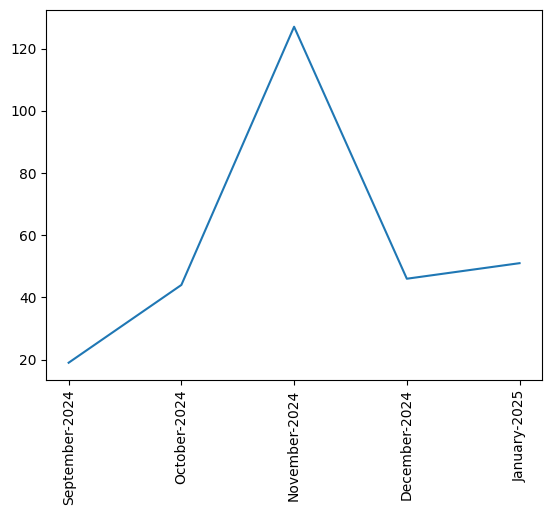

In [37]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [38]:
df['only_date']=df['date'].dt.date

In [39]:
daily_timeline=df.groupby(['only_date']).count()['message'].reset_index()

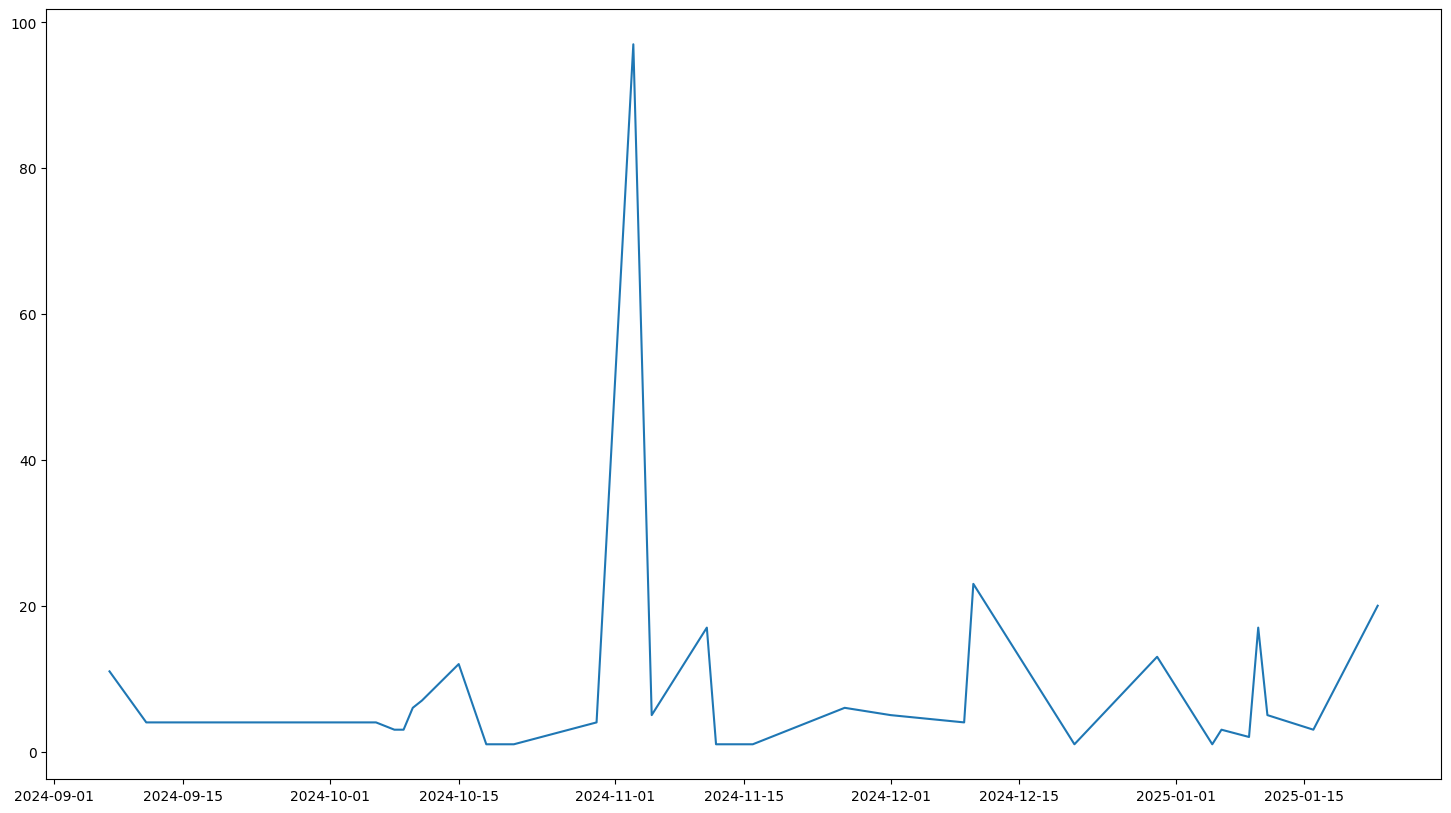

In [40]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.show()

In [41]:
df['day_name']=df['date'].dt.day_name()

In [42]:
week_day_timeline=df.groupby('day_name').count()['message'].reset_index()

In [43]:
week_day_timeline

,day_name,message
0,Friday,25
1,Monday,38
2,Saturday,22
3,Sunday,110
4,Thursday,31
5,Tuesday,50
6,Wednesday,11


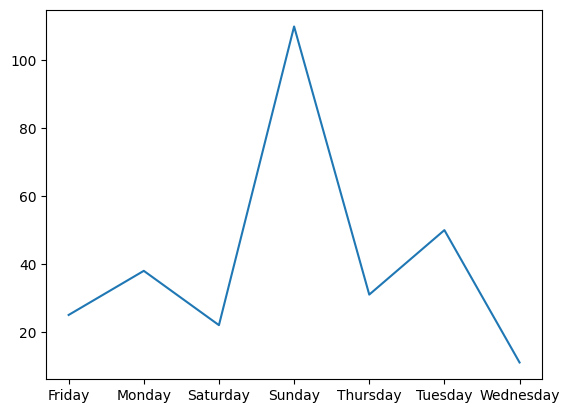

In [44]:
plt.plot(week_day_timeline['day_name'],week_day_timeline['message'])
plt.show()

In [45]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2024-09-07 11:10:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,September,7,11,10,9,2024-09-07,Saturday
1,2024-09-07 11:10:00,group_notification,"Gaurav Roommate created group ""Roomate ""\n",2024,September,7,11,10,9,2024-09-07,Saturday
2,2024-09-07 11:10:00,group_notification,Gaurav Roommate added you\n,2024,September,7,11,10,9,2024-09-07,Saturday
3,2024-09-07 11:11:00,Gaurav Roommate,Ek passports size photo le ana hardcopy bhuda ...,2024,September,7,11,11,9,2024-09-07,Saturday
4,2024-09-07 11:13:00,group_notification,Gaurav Roommate changed the group description\n,2024,September,7,11,13,9,2024-09-07,Saturday


In [53]:
periods=[]
for i in df['hour']:
    if i>=24:
        periods.append(i+'- 1')
    else:
        periods.append(str(i)+'-'+str(int(i)+1))

In [54]:
df['periods']=periods

In [55]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num,only_date,day_name,periods
0,2024-09-07 11:10:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,September,7,11,10,9,2024-09-07,Saturday,11-12
1,2024-09-07 11:10:00,group_notification,"Gaurav Roommate created group ""Roomate ""\n",2024,September,7,11,10,9,2024-09-07,Saturday,11-12
2,2024-09-07 11:10:00,group_notification,Gaurav Roommate added you\n,2024,September,7,11,10,9,2024-09-07,Saturday,11-12
3,2024-09-07 11:11:00,Gaurav Roommate,Ek passports size photo le ana hardcopy bhuda ...,2024,September,7,11,11,9,2024-09-07,Saturday,11-12
4,2024-09-07 11:13:00,group_notification,Gaurav Roommate changed the group description\n,2024,September,7,11,13,9,2024-09-07,Saturday,11-12


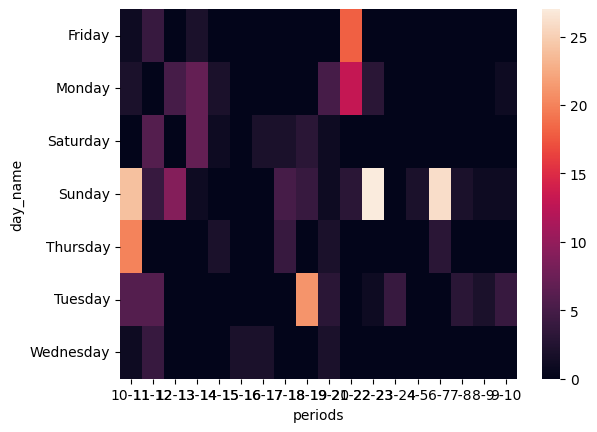

In [68]:
pv_table=df.pivot_table(index="day_name",columns="periods",values="message",aggfunc="count").fillna(0)
sns.heatmap(pv_table)
plt.xticks(rotation="horizontal")
plt.show()